
---

### Zadanie dla Kursantów

1. **Wczytanie i Wstępna Analiza Danych:**  
   - Załaduj dane z `sklearn.datasets.load_breast_cancer()` do jednego DataFrame, zawierającego zarówno cechy, jak i zmienną docelową.  
   - Przeprowadź wstępną eksplorację danych (EDA): wyświetl statystyki opisowe, sprawdź rozkład zmiennej docelowej, wygeneruj wykresy prezentujące zależności pomiędzy cechami a zmienną docelową.

2. **Przygotowanie Danych:**  
   - Sprawdź, czy w danych występują braki lub nierealistyczne wartości. Jeśli tak, zaproponuj sposób ich obsługi (imputacja, usunięcie, inne metody).  
   - Rozważ skalowanie cech lub wybór podzbioru cech, które najlepiej różnicują klasy.

3. **Modelowanie:**  
   - Podziel dane na zbiór treningowy i testowy.  
   - Zbuduj pipeline, który będzie obejmował pre-processing (np. standaryzację) oraz trenowanie modelu (np. LogisticRegression, KNeighborsClassifier).  
   - Wytrenuj oba modele i porównaj ich wyniki (accuracy, precision, recall, F1-score).

4. **Interpretacja i Wnioski:**  
   - Przeanalizuj otrzymane wyniki i zastanów się, który model oraz jakie ustawienia są najbardziej skuteczne.  
   - Zaproponuj, jakie dalsze kroki można by podjąć (np. tuning hiperparametrów, wykorzystanie innego modelu, redukcja wymiarów).

Wyniki i wnioski zaprezentuj w formie notatnika Jupyter.  
Wszystkie kody, analizy i komentarze umieść w przejrzysty i czytelny sposób.


In [1]:


from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Wczytanie danych Breast Cancer z sklearn
data = load_breast_cancer()

# Utworzenie jednego DataFrame
df = pd.DataFrame(np.c_[data.data, data.target], columns=list(data.feature_names) + ['target'])
pd.set_option('display.max_columns',None)

# target 0 = złośliwy (malignant), 1 = łagodny (benign)

In [3]:

# EDA

print(f"Size: {df.shape}\n")

print("Informacje o dataframe:")
display(df.info())

print("\nPierwsze rekordy:")
df.head()


Size: (569, 31)

Informacje o dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null  

None


Pierwsze rekordy:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
print("\nStatystyki opisowe zmiennych numerycznych:")
display(df.describe())


Statystyki opisowe zmiennych numerycznych:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
print("\nRozkład zmiennej docelowej (target 0-złośliwy 1-łagodny):")
print(df['target'].value_counts())

df['target'].value_counts(normalize=True)


Rozkład zmiennej docelowej (target 0-złośliwy 1-łagodny):
target
1.0    357
0.0    212
Name: count, dtype: int64


target
1.0    0.627417
0.0    0.372583
Name: proportion, dtype: float64

63% - łagodny rak
37% - złośliwy rak

In [6]:
# Placeholder: sprawdź i obsłuż ewentualne braki danych
# ...
print("\nIlość braków w poszczególnych kolumnach:")
print(df.isnull().sum())

# Brak wartości NaN - dane są czyste


Ilość braków w poszczególnych kolumnach:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


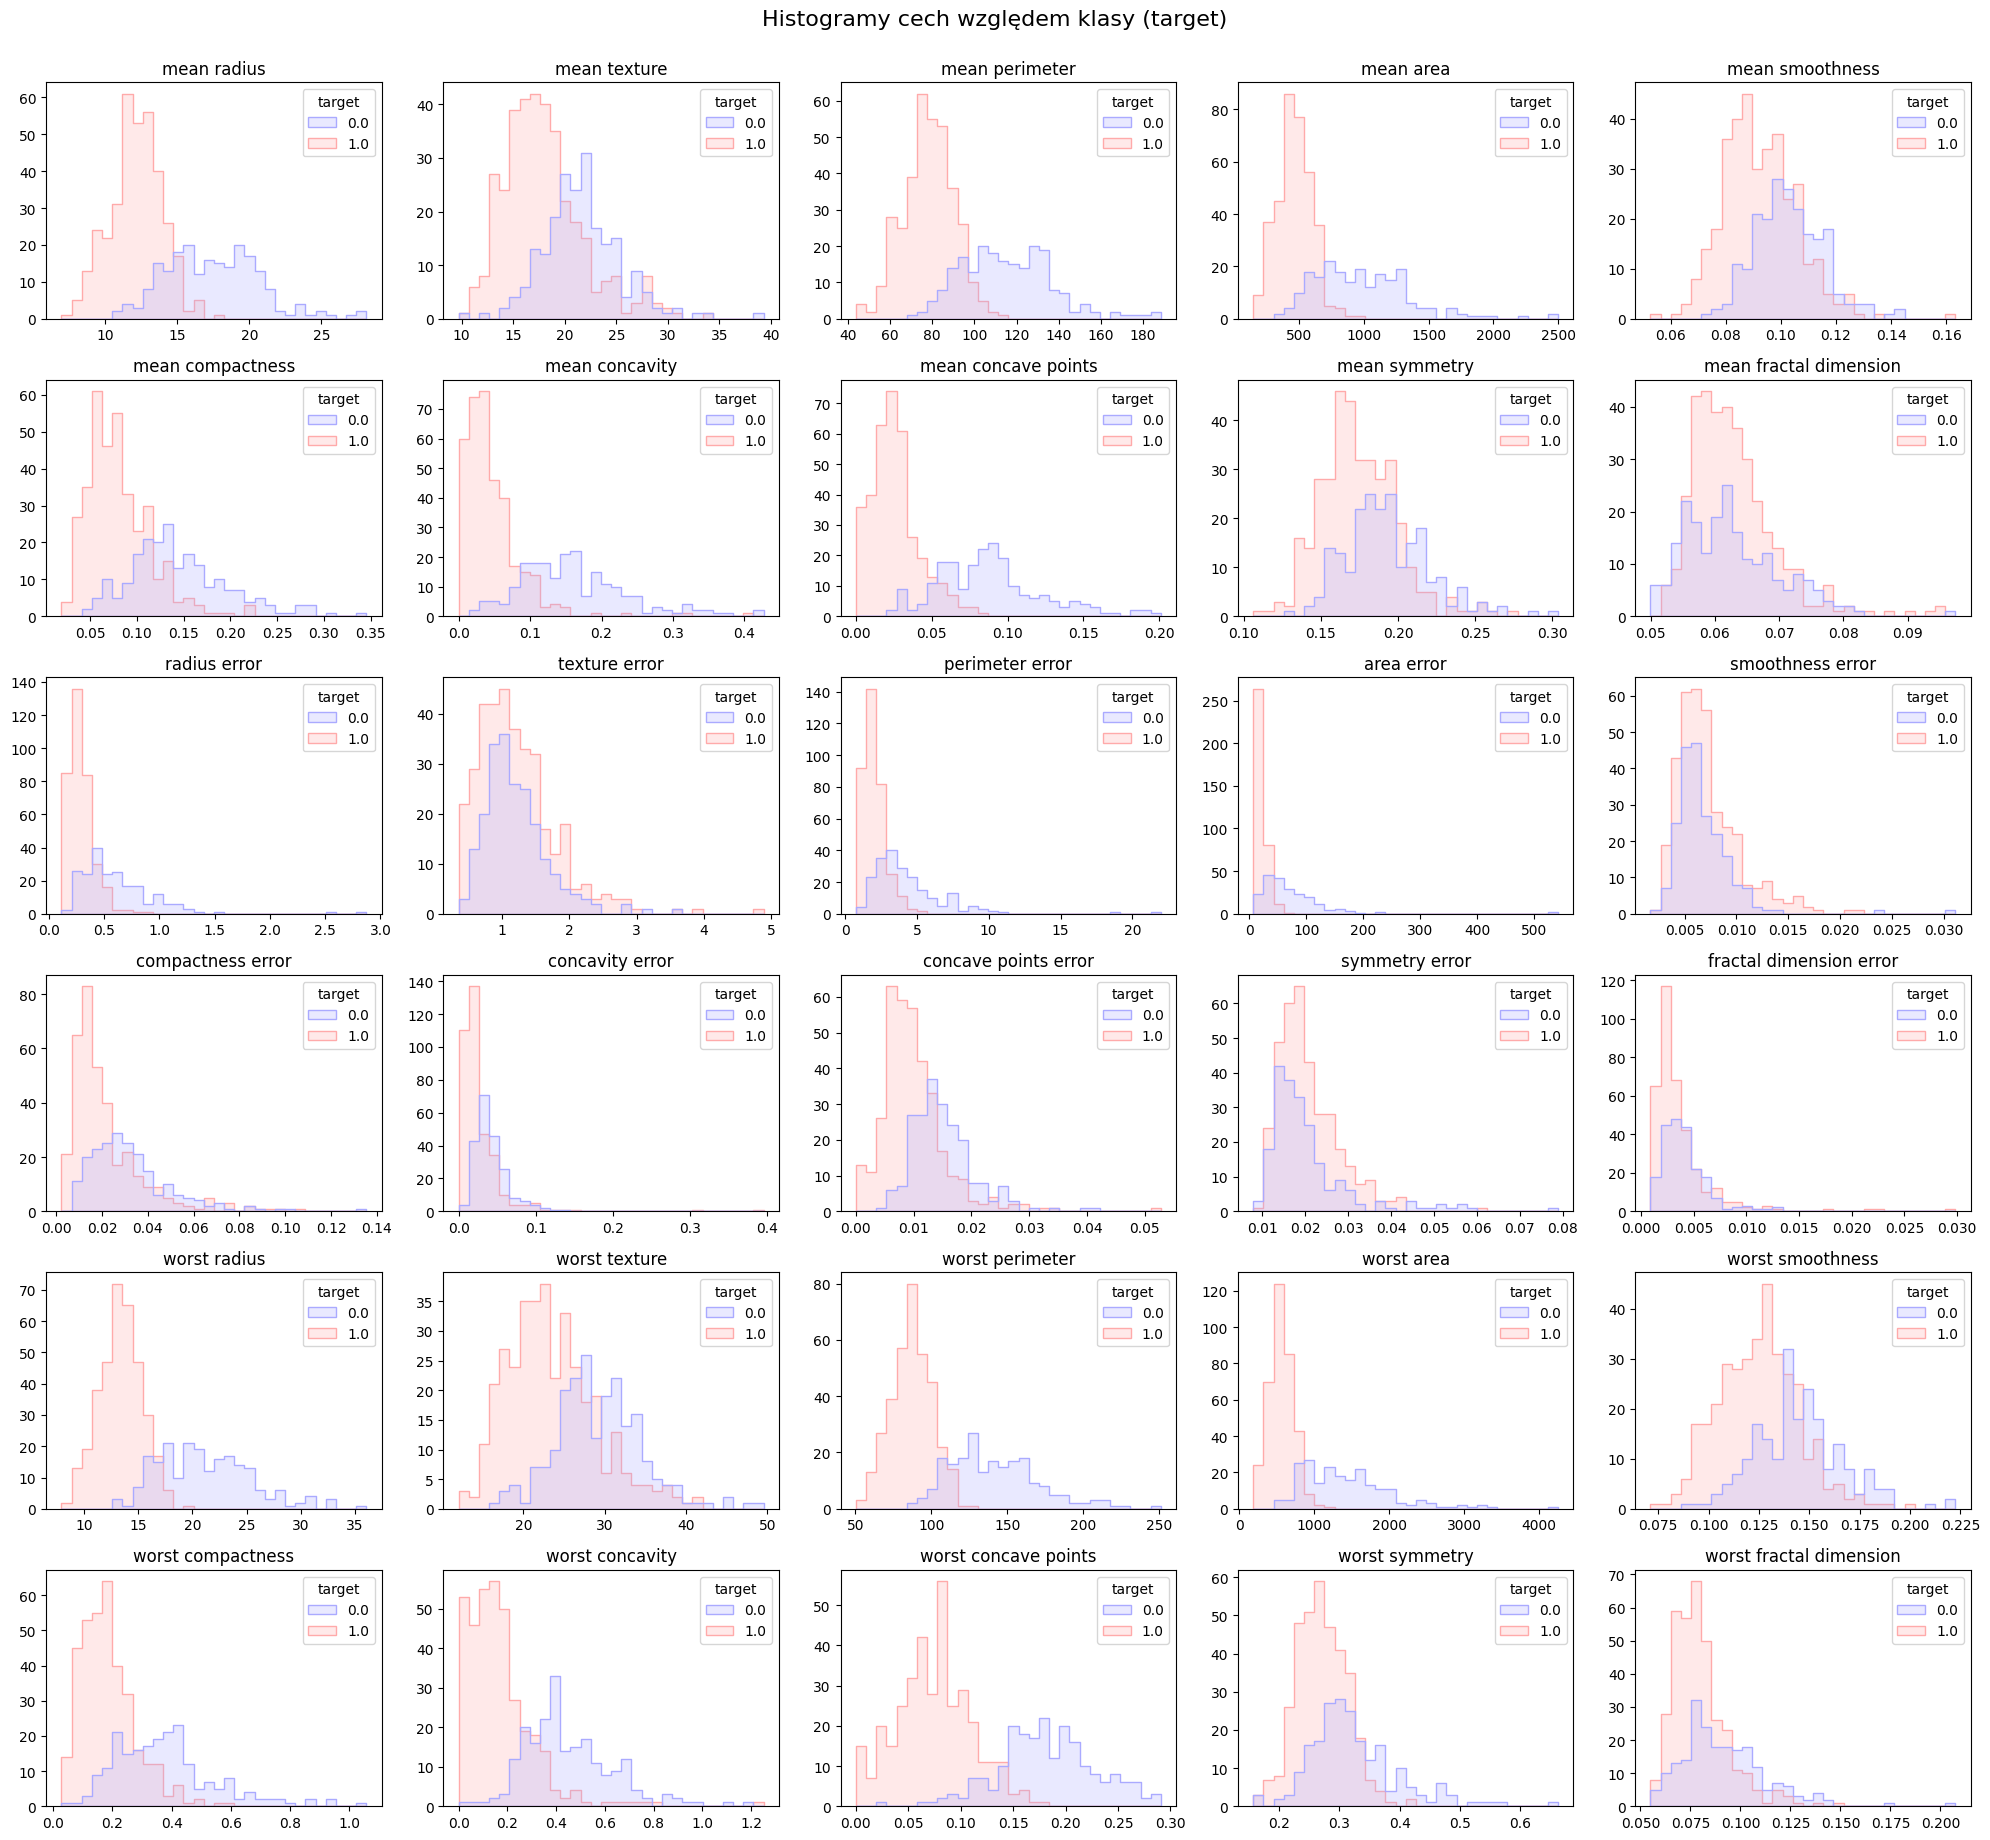

In [6]:
features = data.feature_names
n_cols = 5
n_rows = len(features) // n_cols + int(len(features) % n_cols > 0)

plt.figure(figsize=(20, 3 * n_rows))
for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df, x=feature, hue="target", bins=30, kde=False, palette="bwr", element="step")
    plt.title(feature)
    plt.xlabel("")
    plt.ylabel("")
    plt.tight_layout()

plt.suptitle("Histogramy cech względem klasy (target)", y=1.02, fontsize=16)
plt.show()

In [23]:
# plt.figure()
# sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths= 0.2)
# plt.show()

# corr = df.drop('target', axis=1).corr()
# plt.figure(figsize=(12,10))
# sns.heatmap(corr, cmap="coolwarm", annot=True)
# plt.title("Macierz korelacji")
# plt.show()

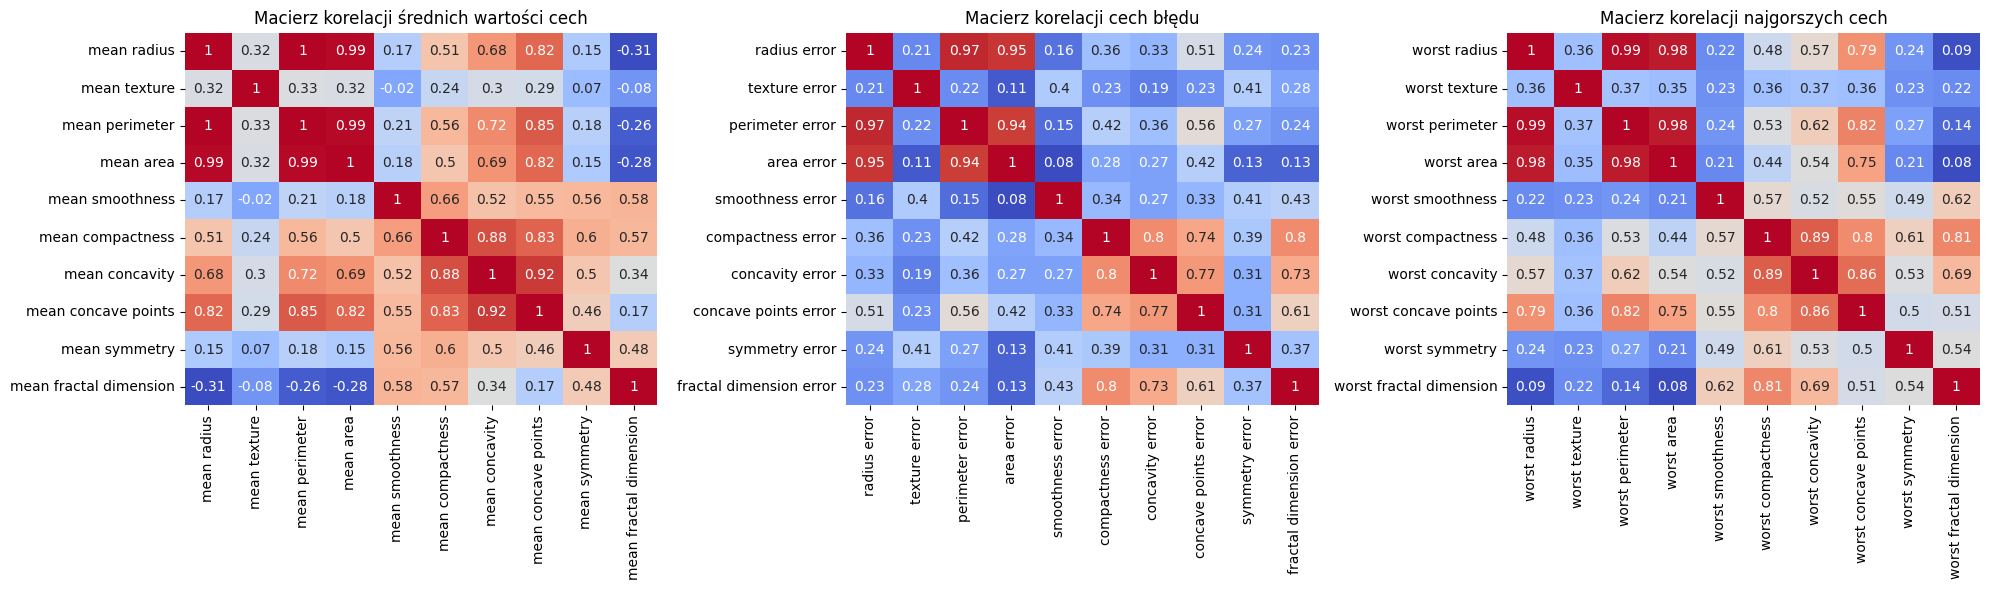

In [7]:
df_mean = df.filter(like="mean",axis=1)
df_error = df.filter(like="error",axis=1)
df_worst = df.filter(like="worst",axis=1)

mean_corr = df_mean.corr().round(2)
error_corr = df_error.corr().round(2)
worst_corr = df_worst.corr().round(2)

fig,axes = plt.subplots(1,3, figsize = (20,6))

sns.heatmap(mean_corr, ax=axes[0],cmap='coolwarm', cbar=False, annot=True)
axes[0].set_title('Macierz korelacji średnich wartości cech')

sns.heatmap(error_corr,ax=axes[1], cmap='coolwarm',cbar=False, annot=True)
axes[1].set_title('Macierz korelacji cech błędu')

sns.heatmap(worst_corr,ax=axes[2],cmap='coolwarm',cbar=False,annot=True)
axes[2].set_title('Macierz korelacji najgorszych cech')

plt.tight_layout()
plt.show()

### Macierz korelacji średnich wartości cech 

- mean radius ma korelację równą 1 z mean perimeter oraz 0,99 ze mean area.

Wynika to z faktu, że wszystkie te cechy opisują rozmiar komórki i niosą bardzo podobne informacje – różnią się głównie skalą przedstawienia. Aby zapobiec wielokolinearności w modelu predykcyjnym, warto pozostawić tylko jedną z tych trzech zmiennych. Ponieważ zarówno obwód (2πr), jak i powierzchnia (πr²) są bezpośrednio obliczane z promienia, najbardziej uzasadnione jest zachowanie promienia i odrzucenie pozostałych dwóch cech.

Dodatkowo zauważalna jest silna korelacja między „średnią zwartością” (mean compactness), „średnią wklęsłością” (mean concavity) i „średnimi punktami wklęsłymi” (mean concave points). Ponieważ „średnie punkty wklęsłe” i „średnia wklęsłość” wykazują również wyższe korelacje z innymi zmiennymi, bardziej wskazane jest pozostawienie „średniej zwartości” i usunięcie dwóch pozostałych zmiennych, aby ograniczyć problem współliniowości.

### Macierz korelacji cech błędu

Tak jak w przypadku średnich wartości, „błąd promienia” (radius error) jest silnie skorelowany z „błędem obwodu” (perimeter error) i „błędem powierzchni” (area error) – współczynniki korelacji wynoszą odpowiednio 0,97 i 0,96. Aby ograniczyć problem wielokolinearności, zasadne jest usunięcie kolumn z błędem obwodu i powierzchni, podobnie jak wcześniej usunięto średni obwód i średnią powierzchnię.

Zbliżony wzorzec silnych zależności występuje również pomiędzy cechami „zwartość”, „wklęsłość” i „punkty wklęsłe” w zestawie błędów, analogicznie jak w przypadku średnich. Z tego względu, dla zachowania spójności i redukcji współliniowości, warto pozostawić tylko „zwartość błędu”, a usunąć kolumny związane z „wklęsłością błędu” i „punktami wklęsłymi błędu”.

### Macierz korelacji najgorszych cech

Macierz korelacji przedstawiona powyżej pokazuje, że występuje wielokolinearność pomiędzy kolumnami zawierającymi wartości średnie a kolumnami z wartościami najgorszymi dla wszystkich 10 cech (np. kolumna ze „średnim promieniem” jest silnie skorelowana z kolumną „najgorszy promień” – współczynnik korelacji wynosi aż 0,97). Wynika to z faktu, że wartości „worst” stanowią w istocie podzbiór wartości średnich.

Aby wyeliminować wielokolinearność, zasadne wydaje się usunięcie wszystkich kolumn zawierających najgorsze wartości.


In [7]:
# Usunięcie zbędnych kolumn

cols = [
        'mean perimeter',
        'perimeter error', 
        'mean area', 
        'area error',
        'mean concavity',
        'concavity error', 
        'mean concave points', 
        'concave points error',
        'worst radius', 
        'worst texture', 
        'worst perimeter', 
        'worst area',
        'worst smoothness', 
        'worst compactness', 
        'worst concavity',
        'worst concave points', 
        'worst symmetry', 
        'worst fractal dimension',
       ]

df_removed_cols = df.copy().drop(cols,axis=1)

df_removed_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean smoothness          569 non-null    float64
 3   mean compactness         569 non-null    float64
 4   mean symmetry            569 non-null    float64
 5   mean fractal dimension   569 non-null    float64
 6   radius error             569 non-null    float64
 7   texture error            569 non-null    float64
 8   smoothness error         569 non-null    float64
 9   compactness error        569 non-null    float64
 10  symmetry error           569 non-null    float64
 11  fractal dimension error  569 non-null    float64
 12  target                   569 non-null    float64
dtypes: float64(13)
memory usage: 57.9 KB


In [8]:
# Placeholder: podział na zbiór treningowy i testowy
# Zbiór danych bez usuwania kolumn

X = df.drop('target',axis=1)
y = df['target'].values

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.2, random_state=42, stratify=y)

# Zbiór danych z cechami wyselekcjowanymi ręcznie
 
X_droped_col = df_removed_cols.drop('target',axis=1)
y_droped_col = df_removed_cols['target'].values

X_train_droped_col,X_test_droped_col,y_train_droped_col,y_test_droped_col = train_test_split(X_droped_col,y_droped_col, train_size=0.2, random_state=42, stratify=y)


In [9]:

# Placeholder: budowa pipeline (imputer, scaler, model)
# ...

#L1: może wyzerować część współczynników, działając jak selekcja cech
#L2: zmniejsza współczynniki, ale rzadko je zeruje

def build_preprocessro_pipeline(use_pca=True)-> Pipeline :
    steps = [('scaler',StandardScaler())]
    
    if use_pca:
        steps.append(('pca',PCA()))

    return Pipeline(steps)

def build_lr_model(use_pca=True):

    lr_pipeline = Pipeline([
    ('preprocessor',build_preprocessro_pipeline(use_pca=use_pca)),
    ('clf',LogisticRegression(random_state=43, max_iter=1000))
    ])

    if use_pca:
        param_grid = {
            'clf__C': [0.1, 1, 10],
            'clf__penalty': ['l2', 'l1', 'elasticnet'],
            'clf__solver': ['lbfgs', 'liblinear', 'saga'],
            'preprocessor__pca__n_components': [10, 15, 25]
        }
    else:
        param_grid = {
            'clf__C': [0.1, 1, 10],
            'clf__penalty': ['l2', 'l1', 'elasticnet'],
            'clf__solver': ['lbfgs', 'liblinear', 'saga']
        }

    return lr_pipeline, param_grid

def build_knn_model(use_pca=True):
   
    knn_pipeline = Pipeline([
    ('preprocessor',build_preprocessro_pipeline(use_pca=use_pca)),
    ('clf', KNeighborsClassifier())
    ])

    if use_pca:
        param_grid = {
            'clf__n_neighbors': [3, 5, 7],
            'preprocessor__pca__n_components':[10,15,25]
        }
    else:
        param_grid = {
            'clf__n_neighbors': [3, 5, 7]
        }

    return knn_pipeline, param_grid
 

In [10]:

# Placeholder: trening i ocena modeli (LR, KNN)

def build_predict_and_show_results(X_train,X_test,y_test,y_train,model_pipeline,parameter_grid,cv,model_name:str):

    grid = GridSearchCV(estimator=model_pipeline,param_grid=parameter_grid, cv=cv,scoring='accuracy', n_jobs=-1)
    grid.fit(X_train,y_train)
    y_pred = grid.predict(X_test)

    print(f"\nWyniki dla {model_name} :")
    print("Accuracy:", accuracy_score(y_test,y_pred))
    print("Best params:", grid.best_params_)
    print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
    print("Classification Report:\n",classification_report(y_test,y_pred,target_names=['benign','malignant']))
    print('--'*50)

# trening i ocena modelu LR z użyciem PCA dla oryginalnego zestawu cech
print('Analiza dla danych oryginalnych z użyciem PCA\n')

lr_pipeline, lr_param_grid = build_lr_model(use_pca=True)
build_predict_and_show_results(X_train,X_test,y_test,y_train,lr_pipeline,lr_param_grid,5,'Logistic Regression')

# trening i ocena modelu KNN z użyciem PCA dla oryginalengo zwstawu cech

knn_pipeline, knn_param_grid = build_knn_model(use_pca=True)
build_predict_and_show_results(X_train,X_test,y_test,y_train,knn_pipeline,knn_param_grid,5,'KNN')

# trening i ocena modelu LR dla danych z ręcznie wybranymi istotnymi cechami
print('--'*50)
print('Analiza dla kolumn usuniętych ręcznie po wybraniu istotnych cech\n')

lr_pipeline_without_pca, lr_param_grid_without_pca = build_lr_model(use_pca=False)
build_predict_and_show_results( X_train_droped_col,
                                X_test_droped_col,
                                y_test_droped_col,
                                y_train_droped_col,
                                lr_pipeline_without_pca,
                                lr_param_grid_without_pca,
                                5,
                                'Logistic Regression')

# trening i ocena modelu KNN dla danych z ręcznie wybranymi istotnymi cechami

knn_pipeline_without_pca, knn_param_grid_without_pca = build_knn_model(use_pca=False)
build_predict_and_show_results(X_train_droped_col,
                               X_test_droped_col,
                               y_test_droped_col,
                               y_train_droped_col,
                               knn_pipeline_without_pca,
                               knn_param_grid_without_pca,
                               5,
                               'KNN')


Analiza dla danych oryginalnych z użyciem PCA



c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\MP\AppData\Local\Pr


Wyniki dla Logistic Regression :
Accuracy: 0.9736842105263158
Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'preprocessor__pca__n_components': 10}
Confusion Matrix:
 [[159  11]
 [  1 285]]
Classification Report:
               precision    recall  f1-score   support

      benign       0.99      0.94      0.96       170
   malignant       0.96      1.00      0.98       286

    accuracy                           0.97       456
   macro avg       0.98      0.97      0.97       456
weighted avg       0.97      0.97      0.97       456

----------------------------------------------------------------------------------------------------

Wyniki dla KNN :
Accuracy: 0.9364035087719298
Best params: {'clf__n_neighbors': 3, 'preprocessor__pca__n_components': 10}
Confusion Matrix:
 [[142  28]
 [  1 285]]
Classification Report:
               precision    recall  f1-score   support

      benign       0.99      0.84      0.91       170
   malignant       0.91    

c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\MP\AppData\Local\Pro

Najlepsze wyniki uzyskał model Logistic Regression z zastosowaniem algorytmu PCA z 10 komponentami (redukcja wymiarowości), który dobrze wpłynął na wyniki i uprościł model.
- Accuracy (0.97) - 97% poprawnych klasyfikacji to bardzo dobry wynik
- Best params: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'preprocessor__pca__n_components': 10}
- Precission - spośród wszystkich próbek zaklasyfikowanych jako benign(łagody) 99% było poprawnie zakwalifikowanych, zaś dla malignant 96%
- Czułość (recall) dla malignant = 1.00, czyli model wykrył wszystkie przypadki nowotworu złośliwego
- F1-score - Świetny balans między precyzją a recall
- support - Liczba próbek danej klasy w zbiorze testowym

Confusion Matrix:
- 159 benignów rozpoznanych poprawnie (TN)
- 11 łagodnych błędnie jako złośliwy (fałszywy alarm) (FP)
- 1 złośliwy nie został wykryty (bardzo dobrze!)
- 285 malignantów poprawnie wykrytych


   